In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose as sd
!pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy import stats 
import itertools
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima.model import ARIMA 
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

In [2]:
stock_data=pd.read_csv("C:\\Users\\sohit\\MTech Time series Project\\bank nifty nse data\\bank nifty data index\\^NSEBANK.csv")
# data=data.drop(["Unnamed: 0"],axis=1)
# data.head()stock_data = pd.read_csv("C:\\Users\\sohit\\MTech Time series Project\\bank nifty nse data\\bank nifty data index\\^NSEBANK.csv", sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)


In [3]:
stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
245,2023-08-30,44706.550781,44779.648438,44149.800781,44232.601563,44232.601563,153100.0
246,2023-08-31,44265.851563,44399.648438,43895.050781,43989.148438,43989.148438,705100.0
247,2023-09-01,43996.101563,44568.550781,43830.750000,44436.101563,44436.101563,320800.0
248,2023-09-04,NaN,NaN,NaN,NaN,NaN,NaN
249,2023-09-05,44625.050781,44668.699219,44401.699219,44532.148438,44532.148438,0.0


In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [5]:
stock_data.shape

(250, 7)

In [6]:
stock_data[stock_data['Volume']==0]

,Date,Open,High,Low,Close,Adj Close,Volume
137,2023-03-22,40036.000000,40085.601563,39837.800781,39999.050781,39999.050781,0.0
235,2023-08-16,43726.250000,44002.800781,43600.351563,43946.398438,43946.398438,0.0
249,2023-09-05,44625.050781,44668.699219,44401.699219,44532.148438,44532.148438,0.0


In [7]:
stock_data[stock_data['Close']==0]

,Date,Open,High,Low,Close,Adj Close,Volume


In [8]:
stock_data[stock_data['Open']==0]

,Date,Open,High,Low,Close,Adj Close,Volume


In [9]:
stock_data[stock_data['High']==0]

,Date,Open,High,Low,Close,Adj Close,Volume


In [10]:
stock_data[stock_data['Low']==0]

,Date,Open,High,Low,Close,Adj Close,Volume


In [11]:
stock_data[stock_data['Adj Close']==0]

,Date,Open,High,Low,Close,Adj Close,Volume


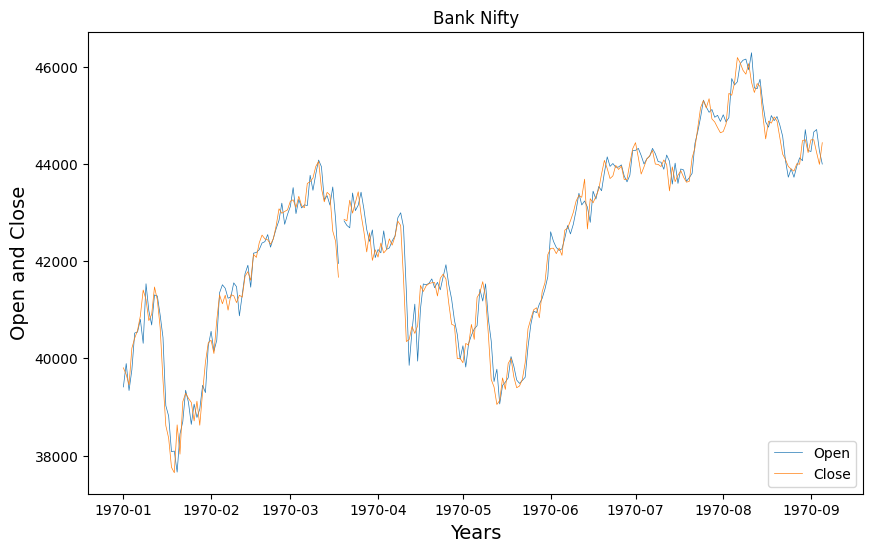

In [12]:
figure, axes = plt.subplots(figsize=(10, 6))
axes.xaxis_date()
axes.plot(stock_data.index, stock_data['Open'],linewidth = '0.5' )
axes.plot(stock_data.index, stock_data['Close'],linewidth = '0.5')
plt.title("Bank Nifty")
plt.xlabel("Years", fontsize=14)
plt.ylabel("Open and Close", fontsize=14)
plt.legend(["Open", "Close"], loc="lower right")
plt.show()

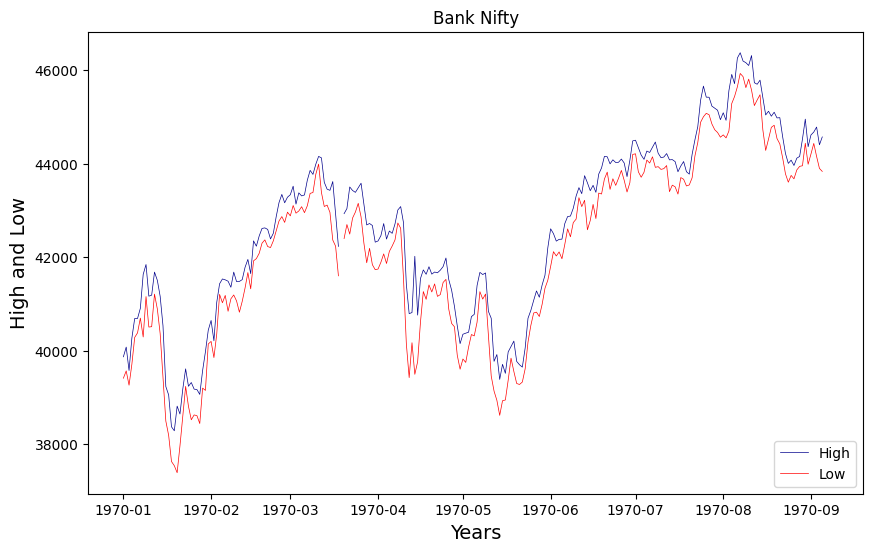

In [13]:
figure, axes = plt.subplots(figsize=(10, 6))
axes.xaxis_date()
axes.plot(stock_data.index, stock_data['High'], color="darkblue",linewidth = '0.5')
axes.plot(stock_data.index, stock_data['Low'], color="red",linewidth = '0.5')
plt.title("Bank Nifty")
plt.xlabel("Years", fontsize=14)
plt.ylabel("High and Low", fontsize=14)
plt.legend(["High", "Low"], loc="lower right")
plt.show()

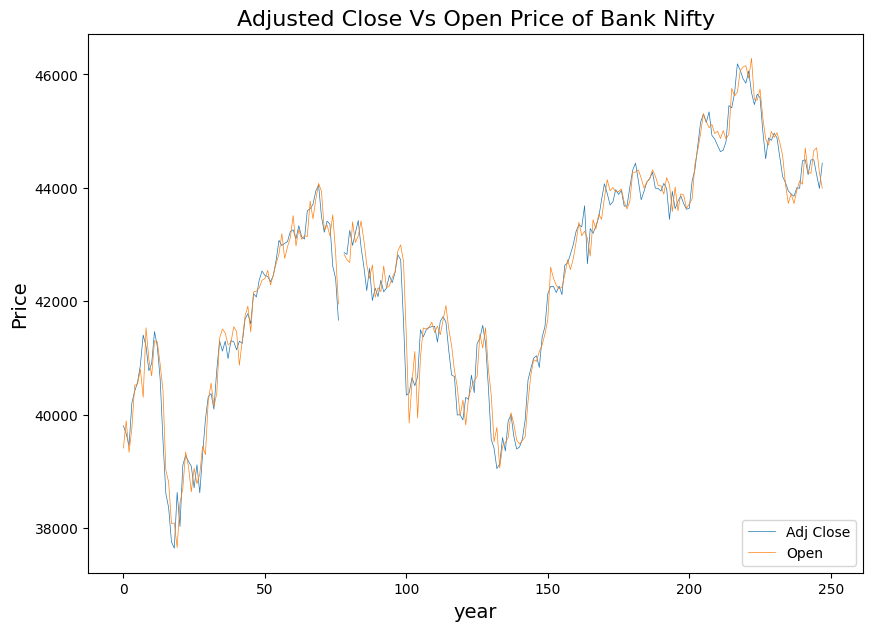

In [14]:
# Plot the adjusted close price
stock_data['Adj Close'].plot(figsize=(10, 7),linewidth=0.5)
stock_data['Open'].plot(figsize=(10, 7),linewidth=0.5)
ticker = 'Bank Nifty'

# Define the label for the title of the figure
plt.title("Adjusted Close Vs Open Price of %s" % ticker, fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('year', fontsize=14)

# Plot the grid lines
#plt.grid(which="major", color='k', linestyle='-.')
#plt.grid(False)
# Show the plot
plt.legend(["Adj Close", "Open"], loc="lower right")
plt.show()

In [15]:
# # Forward fill null values in 'Close', 'Open', and 'Volume' columns with the previous non-zero value
# stock_data['Close'].replace(0, pd.NA, inplace=True)  # Convert 0s to NaN for proper forward fill
# stock_data['Open'].replace(0, pd.NA, inplace=True)
# stock_data['High'].replace(0, pd.NA, inplace=True)
# stock_data['Low'].replace(0, pd.NA, inplace=True)
# stock_data['Adj Close'].replace(0, pd.NA, inplace=True)
# stock_data['Volume'].replace(0, pd.NA, inplace=True)

# stock_data[['Close', 'Open', 'Volume','Low','High','Adj Close']] = stock_data[['Close', 'Open', 'Volume','Low','High','Adj Close']].fillna(method='ffill')

# # Convert back NaNs to 0s
# stock_data.fillna(0, inplace=True)

# # Verify if there are any remaining null values
# print(stock_data.isnull().sum())


In [16]:
import pandas as pd
import numpy as np

stock_data['Close'].replace(0, pd.NA, inplace=True)  # Convert 0s to NaN for proper forward fill
stock_data['Open'].replace(0, pd.NA, inplace=True)
stock_data['High'].replace(0, pd.NA, inplace=True)
stock_data['Low'].replace(0, pd.NA, inplace=True)
stock_data['Adj Close'].replace(0, pd.NA, inplace=True)
stock_data['Volume'].replace(0, pd.NA, inplace=True)

# Convert zeros to NaNs to identify missing or invalid data
# stock_data.replace(0, pd.NA, inplace=True)

# Custom function to fill NaNs with the mean of the previous two values
def fill_with_mean_of_previous_two(series):
    filled_series = series.copy()
    for idx, value in series.items():
        if pd.isna(value):
            previous_values = series[:idx].dropna()[-2:]
            if len(previous_values) >= 2:
                mean_val = previous_values.mean()
                filled_series[idx] = mean_val
            else:
                # If there aren't enough previous values, use forward fill
                filled_series[idx] = series.ffill()[idx]
    return filled_series

# Apply the custom fill function to all relevant columns
columns_to_fill = ['Close', 'Open', 'Volume', 'Low', 'High', 'Adj Close']
stock_data[columns_to_fill] = stock_data[columns_to_fill].apply(fill_with_mean_of_previous_two)

# Optionally convert NaNs back to zeros
stock_data.fillna(0, inplace=True)

# Display the DataFrame after filling missing values
print(stock_data)

# Verify if there are any remaining NaNs
print("Null values in each column after filling:")
print(stock_data.isnull().sum())


           Date          Open          High           Low         Close  \
0    2022-09-05  39412.050781  39865.199219  39407.398438  39805.750000   
1    2022-09-06  39892.949219  40073.750000  39564.300781  39666.500000   
2    2022-09-07  39337.750000  39572.050781  39258.250000  39455.898438   
3    2022-09-08  39763.898438  40265.750000  39706.398438  40208.949219   
4    2022-09-09  40520.750000  40685.949219  40280.300781  40415.699219   
..          ...           ...           ...           ...           ...   
245  2023-08-30  44706.550781  44779.648438  44149.800781  44232.601563   
246  2023-08-31  44265.851563  44399.648438  43895.050781  43989.148438   
247  2023-09-01  43996.101563  44568.550781  43830.750000  44436.101563   
248  2023-09-04  44130.976563  44484.099610  43862.900390  44212.625000   
249  2023-09-05  44625.050781  44668.699219  44401.699219  44532.148438   

        Adj Close    Volume  
0    39805.289063  214100.0  
1    39666.039063  210200.0  
2    3945

In [17]:
stock_data[stock_data['Adj Close']==0]

,Date,Open,High,Low,Close,Adj Close,Volume


In [18]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-05,39412.050781,39865.199219,39407.398438,39805.750000,39805.289063,214100.0
1,2022-09-06,39892.949219,40073.750000,39564.300781,39666.500000,39666.039063,210200.0
2,2022-09-07,39337.750000,39572.050781,39258.250000,39455.898438,39455.441406,138900.0
3,2022-09-08,39763.898438,40265.750000,39706.398438,40208.949219,40208.480469,203800.0
4,2022-09-09,40520.750000,40685.949219,40280.300781,40415.699219,40415.230469,207000.0
...,...,...,...,...,...,...,...
245,2023-08-30,44706.550781,44779.648438,44149.800781,44232.601563,44232.601563,153100.0
246,2023-08-31,44265.851563,44399.648438,43895.050781,43989.148438,43989.148438,705100.0
247,2023-09-01,43996.101563,44568.550781,43830.750000,44436.101563,44436.101563,320800.0
248,2023-09-04,44130.976563,44484.099610,43862.900390,44212.625000,44212.625000,512950.0


In [19]:
# stock_data = stock_data[stock_data['Volume']!=0]

In [20]:
stock_data.shape

(250, 7)

In [21]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [22]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,42445.302672,42662.368180,42158.264649,42411.199016,42411.041297,7.411079e+06
std,1914.998889,1870.496430,1949.662928,1909.885361,1909.965269,1.137081e+08
min,37660.000000,38283.398438,37386.351563,37647.750000,37647.312500,7.430000e+04
25%,41043.263672,41393.423828,40702.274414,41009.611328,41009.611328,1.655750e+05
50%,42659.125000,42796.800781,42355.474610,42595.724610,42595.724610,2.029500e+05
75%,43951.763672,44093.662110,43704.348633,43945.848633,43945.579102,2.452000e+05
max,46285.851563,46369.500000,45925.898438,46186.898438,46186.898438,1.798102e+09


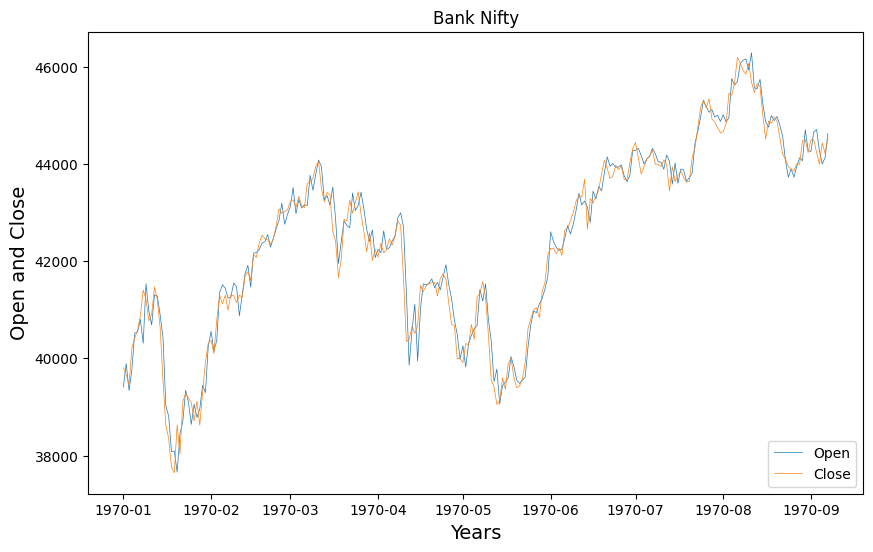

In [23]:
figure, axes = plt.subplots(figsize=(10, 6))
axes.xaxis_date()
axes.plot(stock_data.index, stock_data['Open'],linewidth = '0.5' )
axes.plot(stock_data.index, stock_data['Close'],linewidth = '0.5')
plt.title("Bank Nifty")
plt.xlabel("Years", fontsize=14)
plt.ylabel("Open and Close", fontsize=14)
plt.legend(["Open", "Close"], loc="lower right")
plt.show()


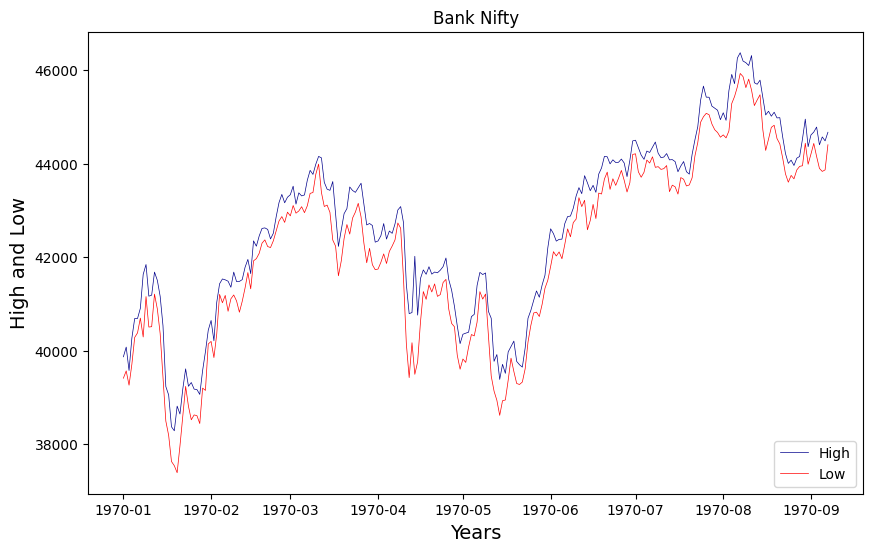

In [24]:
figure, axes = plt.subplots(figsize=(10, 6))
axes.xaxis_date()
axes.plot(stock_data.index, stock_data['High'], color="darkblue",linewidth = '0.5')
axes.plot(stock_data.index, stock_data['Low'], color="red",linewidth = '0.5')
plt.title("Bank Nifty")
plt.xlabel("Years", fontsize=14)
plt.ylabel("High and Low", fontsize=14)
plt.legend(["High", "Low"], loc="lower right")
plt.show()

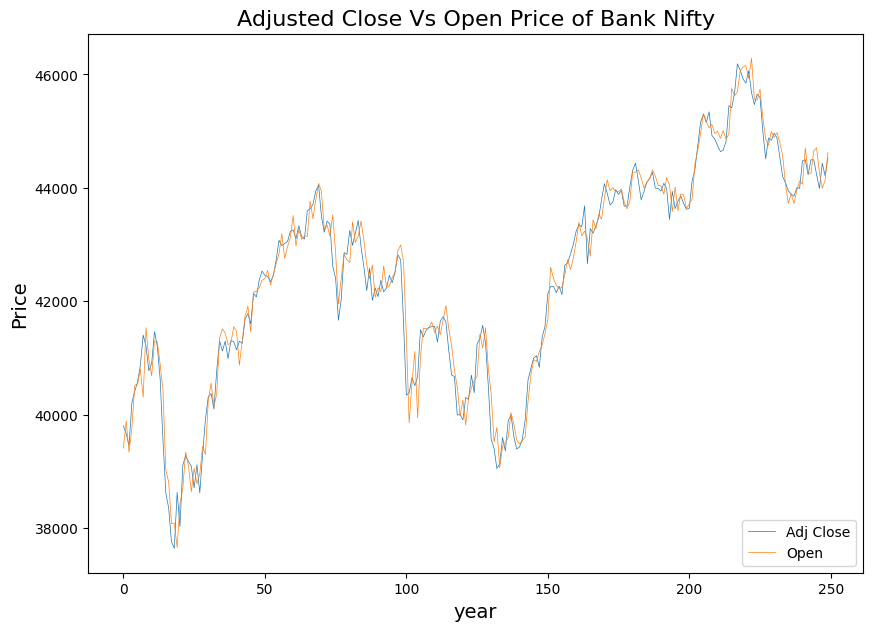

In [25]:
# Plot the adjusted close price
stock_data['Adj Close'].plot(figsize=(10, 7),linewidth=0.5)
stock_data['Open'].plot(figsize=(10, 7),linewidth=0.5)
ticker = 'Bank Nifty'

# Define the label for the title of the figure
plt.title("Adjusted Close Vs Open Price of %s" % ticker, fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('year', fontsize=14)

# Plot the grid lines
#plt.grid(which="major", color='k', linestyle='-.')
#plt.grid(False)
# Show the plot
plt.legend(["Adj Close", "Open"], loc="lower right")
plt.show()

In [26]:
# #Distribution of the dataset
# stock_data['Close'].plot(kind='kde')

In [27]:
stock_data= stock_data.drop(axis=1,labels=['Open','High','Low','Adj Close','Volume'])

In [28]:
# stock_data=stock_data.drop(["Open","High","Low","Close","Volume"],axis=1)

In [29]:
stock_data.head()

,Date,Close
0,2022-09-05,39805.750000
1,2022-09-06,39666.500000
2,2022-09-07,39455.898438
3,2022-09-08,40208.949219
4,2022-09-09,40415.699219


In [30]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'],format='%Y-%m-%d')

In [31]:
stock_data=stock_data.set_index('Date')

In [32]:
stock_data.head()

,Close
Date,
2022-09-05,39805.750000
2022-09-06,39666.500000
2022-09-07,39455.898438
2022-09-08,40208.949219
2022-09-09,40415.699219


In [33]:
weakly_mean = stock_data['Close'].resample('W').mean()

In [34]:
weakly_data = weakly_mean.to_frame()

In [35]:
weakly_data.head()

,Close
Date,
2022-09-11,39910.559375
2022-09-18,40967.700000
2022-09-25,40750.600000
2022-10-02,38202.989844
2022-10-09,38900.150391


<AxesSubplot: xlabel='Date'>

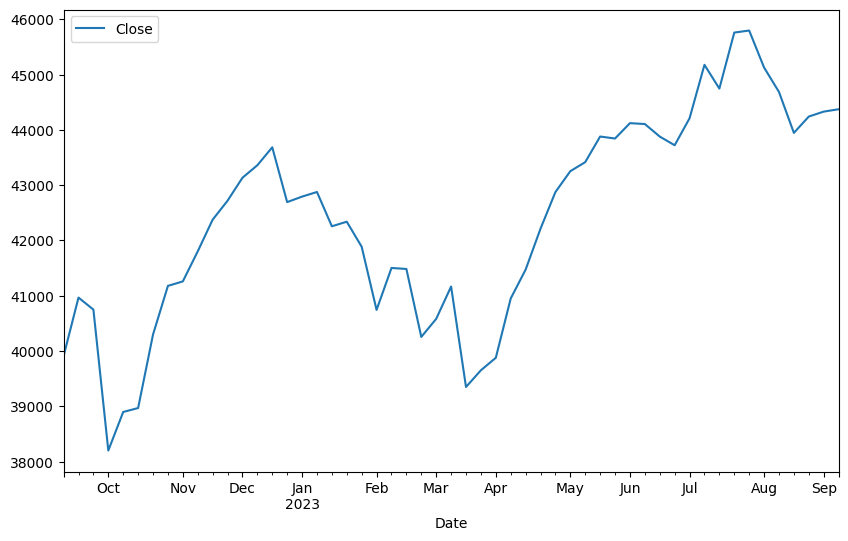

In [36]:
weakly_data.plot()

In [37]:
weakly_data.describe()

,Close
count,53.000000
mean,42398.170928
std,1888.660879
min,38202.989844
25%,40967.700000
50%,42693.610156
75%,43879.239844
max,45795.560938


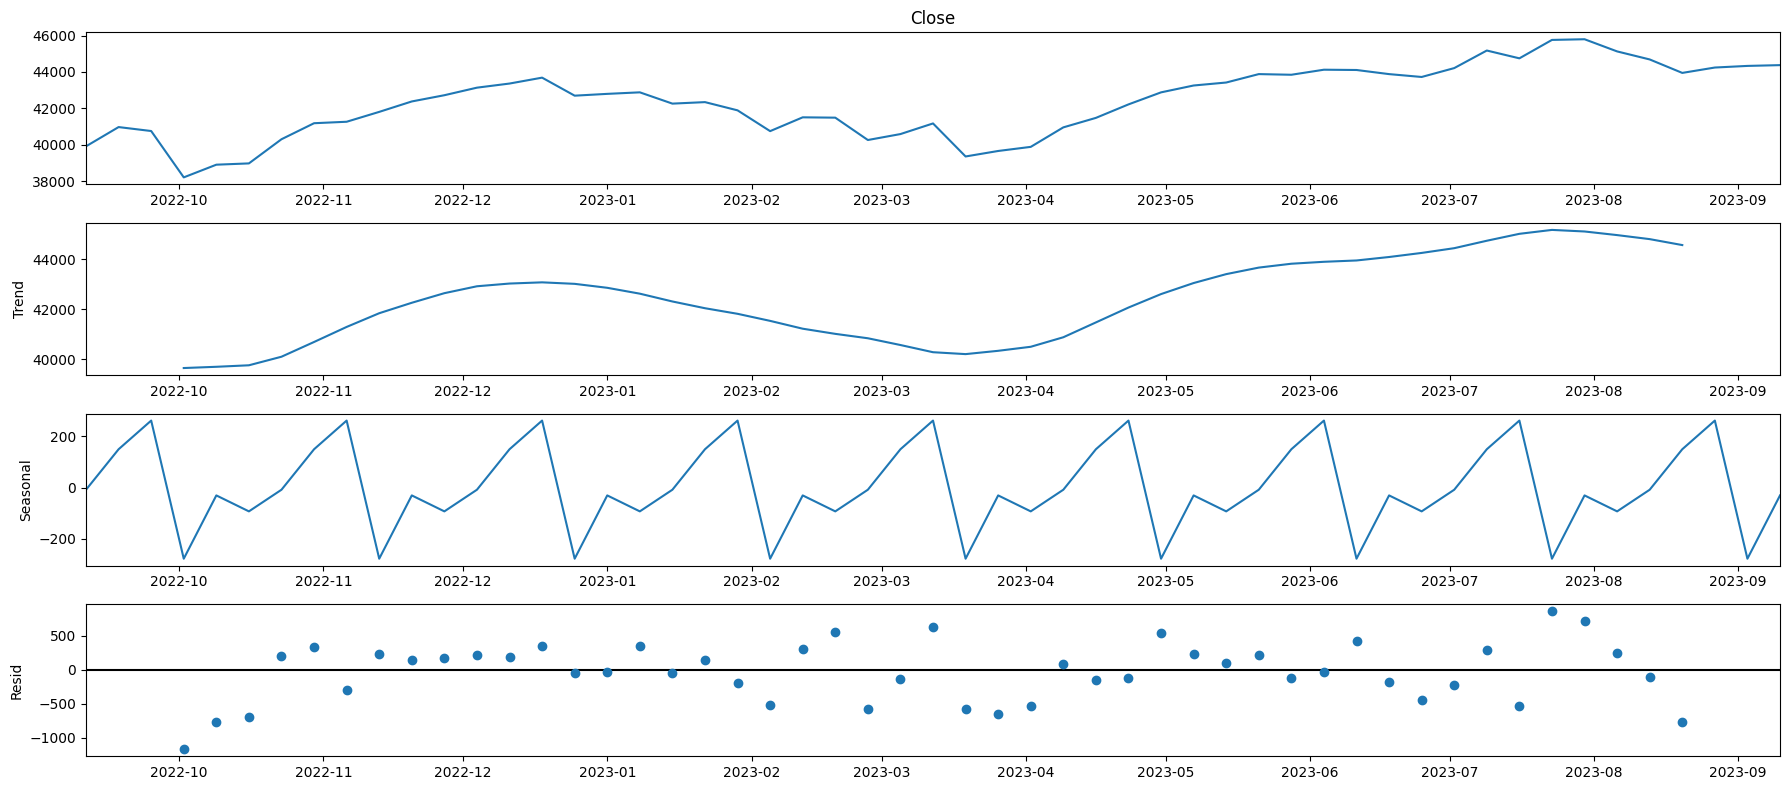

In [38]:
rcParams['figure.figsize'] = 18, 8
decomposed_series = sd(weakly_data['Close'],model='additive',period=6)
decomposed_series.plot()
plt.show()

### Test for Stationarity

Using Augmented Dickey-Fuller(ADF) Test

Null Hypothesis : Time series is non-stationary

Alternate Hypothesis : Time series is stationary

Time Series is Stationary if we have constant mean,constant variance and No Trend and Seasonality.


In [39]:
def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
      print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')


In [40]:
stock_data["lag1"] = stock_data['Close'].diff()
#monthly_data=monthly_data.dropna(axis=0)
stock_data.head()

,Close,lag1
Date,,
2022-09-05,39805.750000,NaN
2022-09-06,39666.500000,-139.250000
2022-09-07,39455.898438,-210.601562
2022-09-08,40208.949219,753.050781
2022-09-09,40415.699219,206.750000


In [41]:
weakly_data["lag1"] = weakly_data['Close'].diff()
#monthly_data=monthly_data.dropna(axis=0)
weakly_data.head()

,Close,lag1
Date,,
2022-09-11,39910.559375,NaN
2022-09-18,40967.700000,1057.140625
2022-09-25,40750.600000,-217.100000
2022-10-02,38202.989844,-2547.610156
2022-10-09,38900.150391,697.160547


In [42]:
ad_fuller_func(stock_data["lag1"].dropna())

ADF Statistic: -7.758982
p-value: 0.000000
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Reject Null Hypothesis(Ho)-Time Series is Stationary


In [43]:
ad_fuller_func(weakly_data["lag1"].dropna())

ADF Statistic: -3.789734
p-value: 0.003014
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599
Reject Null Hypothesis(Ho)-Time Series is Stationary


Text(0.5, 0, 'Lags')

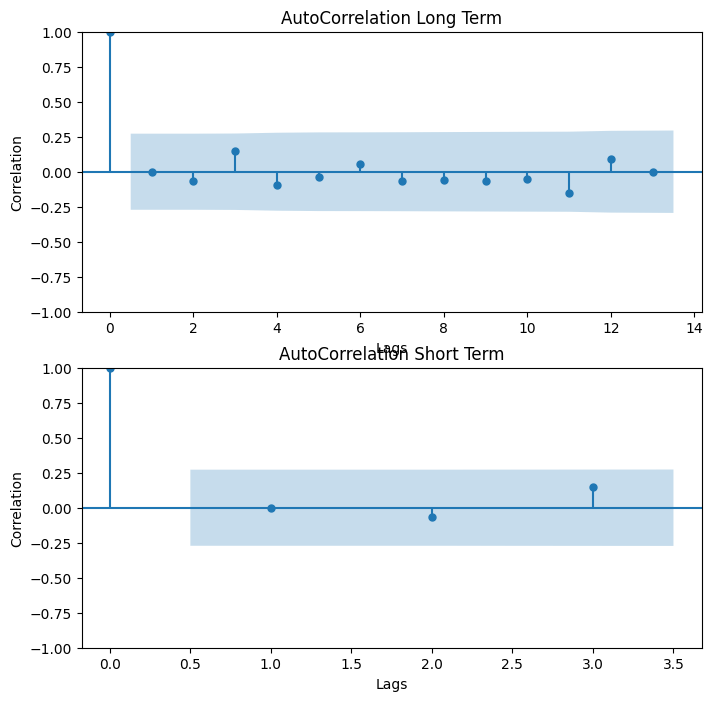

In [44]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(8,8))
acf = plot_acf(weakly_data['lag1'].dropna(),lags=13,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(weakly_data['lag1'].dropna(),lags=3,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

In [45]:
modelling_series = weakly_data['Close']

In [46]:
modelling_series1 = stock_data['Close']
modelling_series1

Date
2022-09-05    39805.750000
2022-09-06    39666.500000
2022-09-07    39455.898438
2022-09-08    40208.949219
2022-09-09    40415.699219
                  ...     
2023-08-30    44232.601563
2023-08-31    43989.148438
2023-09-01    44436.101563
2023-09-04    44212.625000
2023-09-05    44532.148438
Name: Close, Length: 250, dtype: float64

In [47]:
train,test = split(modelling_series,train_size=0.7,shuffle=False)

In [48]:
train1,test1 = split(modelling_series1,train_size=0.7,shuffle=False)

In [54]:
# import pandas as pd
# import pmdarima as pm
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# # MAPE calculation function
# # def mean_absolute_percentage_error(y_true, y_pred):
# #     return 100 * (abs((y_true - y_pred) / y_true)).mean()
# # Define the Auto-ARIMA model
# model = pm.auto_arima(
#     train,
#     seasonal=True,  # If you want to allow seasonal patterns
#     m=5,           # The number of periods in each season (for monthly data, it's 12)
#     stepwise=True,  # Use stepwise algorithm for parameter selection
#     trace=True,     # If you'd like to see the selection process in the console
#     error_action='ignore',  # Ignores invalid configurations
#     suppress_warnings=True, # Suppresses warnings for non-invertible models
# )

# # Fit the model (this step is technically not necessary as auto_arima fits the model during initialization)
# results = model.fit(train)

# # Forecasting time frames, ensure these match with the original data's index
# forecasts_train = results.predict_in_sample(start=0, end=len(train) - 1)
# forecasts_test = results.predict(n_periods=len(test))

# # Define the metrics function
# def result_metrics(test_series, forecast_series, model_name):
#     if len(test_series) != len(forecast_series):
#         raise ValueError("Test and forecast data lengths must be equal")
#     mape_value = mape(test_series, forecast_series)
#     print(f'Mean Absolute Percentage Error = {mape_value * 100:.2f}%')

#     print('Result Metrics for {}'.format(model_name))
#     print('R2 Score:', round(r2_score(test_series, forecast_series), 3))
#     print('Mean Squared Error:', round(mean_squared_error(test_series, forecast_series), 3))
#     print('Mean Absolute Error:', round(mean_absolute_error(test_series, forecast_series), 3))
# #     print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(test_series, forecast_series)), '%')

# # Now check the results
# print(result_metrics(train, forecasts_train, 'Auto-ARIMA-Train Data'))
# print('----')
# print(result_metrics(test, forecasts_test, 'Auto-ARIMA-Test Data'))


In [50]:
# import pandas as pd
# import pmdarima as pm
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # MAPE calculation function
# def mean_absolute_percentage_error(y_true, y_pred):
#     return 100 * (abs((y_true - y_pred) / y_true)).mean()

# # Assuming 'train' and 'test' data are pandas Series with DatetimeIndex
# # train = pd.Series(...)
# # test = pd.Series(...)

# # Define the Auto-ARIMA model
# model = pm.auto_arima(
#     train,
#     seasonal=True,  # Allow for seasonal patterns
#     m=5,           # Periodicity for monthly data
#     stepwise=True,  # Use stepwise approach for parameter selection
#     trace=True,     # Enable tracing for model selection process
#     error_action='ignore',  # Ignore invalid configurations
#     suppress_warnings=True, # Suppress non-critical warnings
# )

# # Fit the model
# results = model.fit(train)

# # Forecasting: ensure these match with the original data's index
# forecasts_train = results.predict_in_sample(start=0, end=len(train) - 1)
# forecasts_test = results.predict(n_periods=len(test))

# # Define the metrics function, now including MAPE
# def result_metrics(test_series, forecast_series, model_name):
#     if len(test_series) != len(forecast_series):
#         raise ValueError("Test and forecast data lengths must be equal")
    
#     print(f'Result Metrics for {model_name}')
#     print('R2 Score:', round(r2_score(test_series, forecast_series), 3))
#     print('Mean Squared Error:', round(mean_squared_error(test_series, forecast_series), 3))
#     print('Mean Absolute Error:', round(mean_absolute_error(test_series, forecast_series), 3))
#     print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(test_series, forecast_series), 3), '%')

# # Now evaluate the results
# print(result_metrics(train, forecasts_train, 'Auto-ARIMA - Train Data'))
# print('----')
# print(result_metrics(test, forecasts_test, 'Auto-ARIMA - Test Data'))


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[5] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[5] intercept   : AIC=645.275, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[5] intercept   : AIC=607.253, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[5] intercept   : AIC=622.848, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[5]             : AIC=645.275, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[5] intercept   : AIC=605.255, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[5] intercept   : AIC=607.249, Time=0.07 sec
 ARIMA(1,0,0)(1,0,1)[5] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[5] intercept   : AIC=607.097, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[5] intercept   : AIC=607.134, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[5] intercept   : AIC=621.369, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[5] intercept   : AIC=609.978, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[5]             : AIC=605.255, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[5] intercept
Total fit time: 1.091 seconds


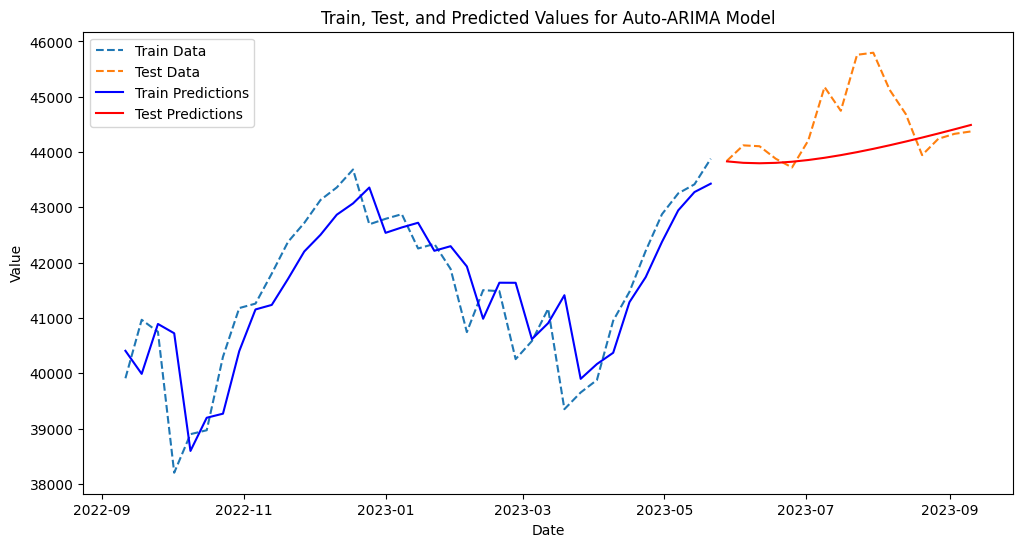

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import pmdarima as pm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Sample train and test data with DatetimeIndex
# Assuming 'train' and 'test' data are defined as pandas Series with a date-based index
# train = pd.Series([...], index=pd.date_range(start='2022-01-01', periods=24, freq='M'))
# test = pd.Series([...], index=pd.date_range(start='2024-01-01', periods=6, freq='M'))

# Auto-ARIMA Model
model = pm.auto_arima(
    train,
    seasonal=True,  # Enable seasonal pattern
    m=5,           # Specify the periodicity (quarterly in this case)
    stepwise=True,  # Stepwise parameter search
    trace=True,     # Output trace during model search
    error_action='ignore',  # Ignore invalid models
    trend='ct',
    suppress_warnings=True, # Suppress non-critical warnings
)

# Fit the model
results = model.fit(train)

# Forecasting for train and test data
forecasts_train = results.predict_in_sample(start=0, end=len(train) - 1)
forecasts_test = results.predict(n_periods=len(test))

# Plotting the results
plt.figure(figsize=(12, 6))  # Create a figure with a defined size
plt.plot(train, label='Train Data', linestyle='--')  # Plot the training data
plt.plot(test, label='Test Data', linestyle='--')  # Plot the test data
plt.plot(train.index, forecasts_train, label='Train Predictions', linestyle='-', color='blue')  # Train predictions
plt.plot(test.index, forecasts_test, label='Test Predictions', linestyle='-', color='red')  # Test predictions

plt.title("Train, Test, and Predicted Values for Auto-ARIMA Model")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()  # Add a legend to the plot
plt.show()  # Display the plot


In [52]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import pmdarima as pm
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # Sample train and test data with DatetimeIndex
# # Assuming 'train' and 'test' data are defined as pandas Series with a date-based index
# # train = pd.Series([...], index=pd.date_range(start='2022-01-01', periods=24, freq='M'))
# # test = pd.Series([...], index=pd.date_range(start='2024-01-01', periods=6, freq='M'))

# # Auto-ARIMA Model
# model = pm.auto_arima(
#     train1,
#     seasonal=True,  # Enable seasonal pattern
#     m=5,           # Specify the periodicity (quarterly in this case)
#     stepwise=True,  # Stepwise parameter search
#     trace=True,     # Output trace during model search
#     error_action='ignore',  # Ignore invalid models
#     trend='c',
#     suppress_warnings=True, # Suppress non-critical warnings
# )

# # Fit the model
# results = model.fit(train1)

# # Forecasting for train and test data
# forecasts_train = results.predict_in_sample(start=1, end=len(train1) )
# forecasts_test = results.predict(n_periods=len(test1))

# # Plotting the results
# plt.figure(figsize=(12, 6))  # Create a figure with a defined size
# plt.plot(train1, label='Train Data', linestyle='--')  # Plot the training data
# plt.plot(test1, label='Test Data', linestyle='--')  # Plot the test data
# plt.plot(train1.index, forecasts_train, label='Train Predictions', linestyle='-', color='blue')  # Train predictions
# plt.plot(test1.index, forecasts_test, label='Test Predictions', linestyle='-', color='red')  # Test predictions

# plt.title("Train, Test, and Predicted Values for Auto-ARIMA Model")
# plt.xlabel("Date")
# plt.ylabel("Value")
# plt.legend()  # Add a legend to the plot
# plt.show()  # Display the plot


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  150
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1114.063
Date:                Sun, 05 May 2024   AIC                           2234.126
Time:                        02:46:03   BIC                           2243.158
Sample:                             0   HQIC                          2237.796
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.124e+04    730.715     56.445      0.000    3.98e+04    4.27e+04
ar.L1          0.9577      0.022     43.485      0.000       0.914       1.001
sigma2      1.626e+05   1.77e+04      9.169      0.0

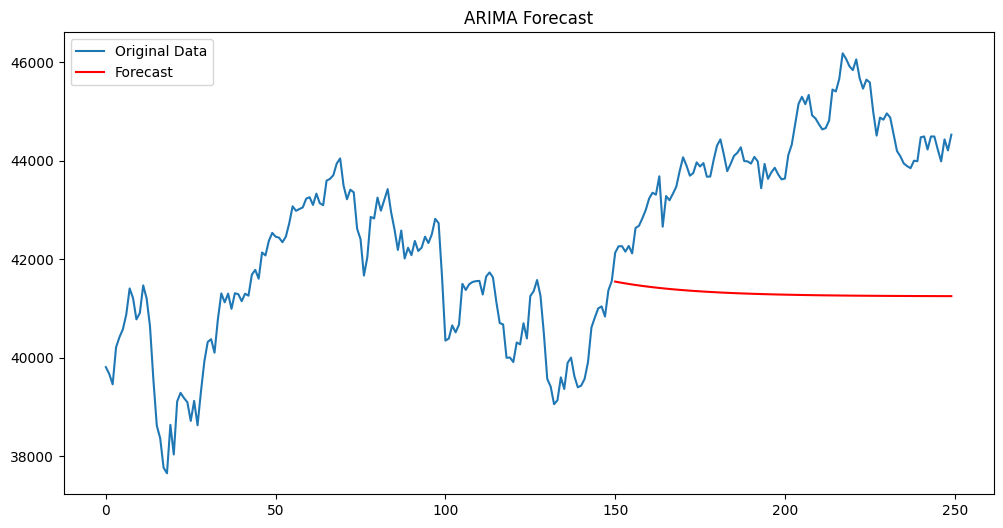

In [53]:
# Sample data with 'Adj Close' column
# weakly_data.set_index('Date', inplace=True)  # Use 'Date' as the index

# Split into train and test sets
percentage = 0.60  # 80% for training, 20% for testing
series = stock_data['Close'].tolist()  # Convert 'Close' to a list
size = int(len(series) * percentage)
train, test = series[:size], series[size:]

# Fit the ARIMA model with the correct import path
model = ARIMA(train, order=(1, 0, 0))  # AR(9) model
model_fit = model.fit()

# Summary of the fitted model
print(model_fit.summary())

# Forecast future values for the test set
forecast = model_fit.forecast(steps=len(test))

# Calculate RMSE for the test set
rmse = mean_squared_error(test, forecast, squared=False)
mape_value = mape(test, forecast)

print("Test RMSE:", rmse)
print(f'Mean Absolute Percentage Error = {mape_value * 100:.2f}%')

# Plot the training and test data with the forecast
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original Data')
plt.plot(range(size, size + len(test)), forecast, label='Forecast', color='red')
plt.legend()
plt.title("ARIMA Forecast")
plt.show()
